<a href="https://colab.research.google.com/github/KJLumalang/ITBA-3206_Planeteers/blob/main/ITBA_3206_Planeteers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Driving Down Greenhouse Gas Emissions through Clean Energy**

The goal of this analysis is to analyze and show the increasing amount of 
emissions and which or what are the sources of these emissions. The means of 
data analysis will help to provide possible solutions to the massive and 
increasing amount of greenhouse gas emissions. 


# **Libraries and Data Set**

---



Importing libraries and data sets

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
pd.option_context('display.max_rows', None)
pd.option_context('display.max_columns', None)

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/KJLumalang/ITBA-3206_Planeteers/main/historical_emissions.csv')

# **Data Cleaning**

---



In [44]:
df.head(579)
display(df)

,Country,Data source,Sector,Gas,Unit,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Energy,All GHG,MtCO₂e,37636.10,37603.22,36777.63,36188.89,36173.70,...,25389.87,25257.77,25075.28,24656.11,24150.88,23501.77,23395.58,23265.41,23365.41,23244.24
1,World,CAIT,Electricity/Heat,All GHG,MtCO₂e,15834.64,15875.48,15416.96,15081.51,15059.71,...,10172.97,10123.51,9895.91,9624.07,9268.36,9074.97,8978.95,8929.03,8768.70,8627.95
2,China,CAIT,Energy,All GHG,MtCO₂e,10618.71,10432.77,10025.78,9806.69,9860.68,...,3236.82,3340.24,3252.67,3198.31,3227.72,2899.43,2787.71,2571.87,2474.85,2360.68
3,World,CAIT,Transportation,All GHG,MtCO₂e,8434.96,8417.75,8278.48,8073.90,7923.23,...,5731.34,5566.90,5440.03,5360.38,5148.97,5012.39,4913.80,4871.85,4764.85,4725.54
4,China,CAIT,Electricity/Heat,All GHG,MtCO₂e,5616.35,5405.58,5060.66,4721.35,4616.44,...,1439.69,1416.39,1334.53,1336.76,1191.43,1088.00,1002.36,881.91,798.08,728.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Nepal,CAIT,Electricity/Heat,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.05,0.09,0.09,0.03,0.03,0.07,0.06,0.04,0.03,0.00
575,Paraguay,CAIT,Electricity/Heat,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.02,0.03,0.11,0.01,0.03,0.04,0.04,0.04
576,Eswatini,CAIT,Electricity/Heat,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
577,Tuvalu,CAIT,Transportation,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Removing unecessary column

In [45]:
df = df.drop(columns = 'Data source')
df = df.drop(columns = 'Unit')
df

,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,Energy,All GHG,37636.10,37603.22,36777.63,36188.89,36173.70,36279.47,36184.99,...,25389.87,25257.77,25075.28,24656.11,24150.88,23501.77,23395.58,23265.41,23365.41,23244.24
1,World,Electricity/Heat,All GHG,15834.64,15875.48,15416.96,15081.51,15059.71,15336.57,15390.22,...,10172.97,10123.51,9895.91,9624.07,9268.36,9074.97,8978.95,8929.03,8768.70,8627.95
2,China,Energy,All GHG,10618.71,10432.77,10025.78,9806.69,9860.68,9959.18,9958.66,...,3236.82,3340.24,3252.67,3198.31,3227.72,2899.43,2787.71,2571.87,2474.85,2360.68
3,World,Transportation,All GHG,8434.96,8417.75,8278.48,8073.90,7923.23,7685.67,7558.39,...,5731.34,5566.90,5440.03,5360.38,5148.97,5012.39,4913.80,4871.85,4764.85,4725.54
4,China,Electricity/Heat,All GHG,5616.35,5405.58,5060.66,4721.35,4616.44,4712.49,4766.22,...,1439.69,1416.39,1334.53,1336.76,1191.43,1088.00,1002.36,881.91,798.08,728.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Nepal,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.05,0.09,0.09,0.03,0.03,0.07,0.06,0.04,0.03,0.00
575,Paraguay,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.02,0.03,0.11,0.01,0.03,0.04,0.04,0.04
576,Eswatini,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
577,Tuvalu,Transportation,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Finding cells with null values and replacing them with N/A

In [46]:
df.isnull().sum()

Country     0
Sector      0
Gas         0
2019        0
2018        0
2017        0
2016        0
2015        0
2014        0
2013        0
2012        0
2011        2
2010        2
2009        2
2008        2
2007        2
2006        2
2005        2
2004        4
2003        4
2002        4
2001        4
2000        4
1999        8
1998        8
1997        8
1996        8
1995        8
1994       10
1993       10
1992       10
1991       12
1990       15
dtype: int64

Showing rows with null value

In [47]:
nan_rows  = df.loc[df.isna().any(axis=1)]
display(nan_rows)


,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
218,Laos,Electricity/Heat,All GHG,14.06,14.10,13.99,10.92,3.73,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,Cambodia,Transportation,All GHG,5.88,5.42,4.96,4.66,4.21,3.82,3.49,...,1.40,1.44,1.24,1.19,1.19,NaN,NaN,NaN,NaN,NaN
328,Cambodia,Electricity/Heat,All GHG,4.70,3.89,3.66,3.40,2.39,1.53,0.73,...,0.34,0.31,0.26,0.20,0.16,NaN,NaN,NaN,NaN,NaN
343,Namibia,Energy,All GHG,3.94,3.94,3.98,3.98,3.99,3.76,3.63,...,2.07,2.11,2.06,2.01,1.85,1.71,1.49,1.29,1.19,NaN
375,Laos,Transportation,All GHG,2.52,3.18,3.10,3.05,2.40,2.28,1.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,Namibia,Transportation,All GHG,2.09,2.12,2.10,2.11,2.12,2.03,1.92,...,1.17,1.14,1.10,1.07,0.64,0.59,0.55,0.53,0.49,NaN
408,Montenegro,Electricity/Heat,All GHG,1.53,1.49,1.29,1.26,1.56,1.49,1.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,Suriname,Electricity/Heat,All GHG,1.09,0.97,1.04,1.23,1.53,1.43,1.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,Suriname,Transportation,All GHG,0.91,0.70,0.85,1.03,0.70,0.69,0.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,South Sudan,Transportation,All GHG,0.85,0.75,0.75,0.96,1.04,0.99,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replacing null values with N/A

In [48]:
df = df.fillna('N/A')

Checking if there are no null values anymore

In [49]:
df.isnull().sum()

Country    0
Sector     0
Gas        0
2019       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
2000       0
1999       0
1998       0
1997       0
1996       0
1995       0
1994       0
1993       0
1992       0
1991       0
1990       0
dtype: int64

# **Visualization**

---



**Energy**

Filtering by Energy sector

In [50]:
energy_data = df.loc[df['Sector'] == 'Energy']
display(energy_data)

,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,Energy,All GHG,37636.10,37603.22,36777.63,36188.89,36173.70,36279.47,36184.99,...,25389.87,25257.77,25075.28,24656.11,24150.88,23501.77,23395.58,23265.41,23365.41,23244.24
2,China,Energy,All GHG,10618.71,10432.77,10025.78,9806.69,9860.68,9959.18,9958.66,...,3236.82,3340.24,3252.67,3198.31,3227.72,2899.43,2787.71,2571.87,2474.85,2360.68
5,United States,Energy,All GHG,5246.37,5372.73,5177.80,5239.70,5355.68,5471.15,5435.44,...,5876.78,5863.62,5817.29,5546.45,5387.41,5334.97,5255.97,5147.1,5073.75,5112.27
6,European Union (27),Energy,All GHG,2731.36,2869.38,2935.99,2915.36,2905.92,2845.27,2998.50,...,3347.54,3407.89,3419.04,3492.09,3389.17,3336.96,3357.54,3412.3,3535.21,3569.46
7,India,Energy,All GHG,2422.24,2421.71,2305.08,2177.18,2144.32,2133.15,1963.54,...,924.19,863.68,848.91,805.05,770.77,718.91,685.7,661.97,645.15,602.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Cook Islands,Energy,All GHG,0.09,0.09,0.09,0.08,0.07,0.08,0.08,...,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.04
535,Kiribati,Energy,All GHG,0.09,0.09,0.09,0.07,0.06,0.06,0.06,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02
549,Nauru,Energy,All GHG,0.06,0.06,0.07,0.06,0.06,0.05,0.05,...,0.09,0.1,0.1,0.1,0.11,0.11,0.11,0.12,0.13,0.13
563,Niue,Energy,All GHG,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


Top 5 Country and Their GHG Emission by Energy Sector as year passed by

In [51]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 World Emission is 23.2 Gt")
display(energy_data.loc[0:8,["Country","1990"]], )
print("2010 World Emission is 34.2 Gt")
display(energy_data.loc[0:8,["Country","2010"]], )
print("2019 World Emission is 37.6 Gt")
display(energy_data.loc[0:8,["Country","2019"]], )

1990 World Emission is 23.2 Gt


,Country,1990
0,World,23244.24
2,China,2360.68
5,United States,5112.27
6,European Union (27),3569.46
7,India,602.05
8,Russia,2639.05


2010 World Emission is 34.2 Gt


,Country,2010
0,World,34193.57
2,China,8485.09
5,United States,5700.68
6,European Union (27),3225.42
7,India,1668.13
8,Russia,2046.1


2019 World Emission is 37.6 Gt


,Country,2019
0,World,37636.10
2,China,10618.71
5,United States,5246.37
6,European Union (27),2731.36
7,India,2422.24
8,Russia,2208.96


Bar plot of emission 

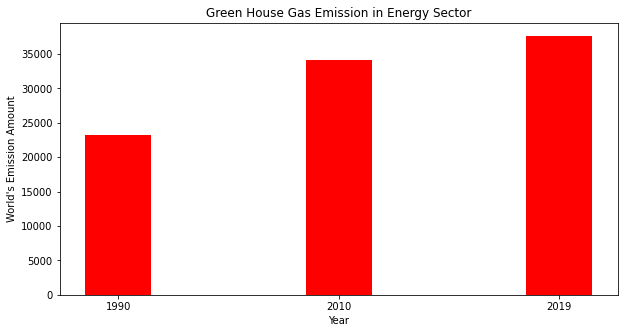

In [52]:
data = {'1990':23244, '2010':34194, '2019':37636}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='red',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Energy Sector")
plt.show()

**Electricity/Heat**

Filtering by Electricity/Heat

In [53]:
electricity_data = df.loc[df['Sector'] == 'Electricity/Heat']
display(electricity_data)

,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,World,Electricity/Heat,All GHG,15834.64,15875.48,15416.96,15081.51,15059.71,15336.57,15390.22,...,10172.97,10123.51,9895.91,9624.07,9268.36,9074.97,8978.95,8929.03,8768.7,8627.95
4,China,Electricity/Heat,All GHG,5616.35,5405.58,5060.66,4721.35,4616.44,4712.49,4766.22,...,1439.69,1416.39,1334.53,1336.76,1191.43,1088.0,1002.36,881.91,798.08,728.78
9,United States,Electricity/Heat,All GHG,1965.56,2105.01,2072.96,2154.19,2243.24,2386.49,2388.77,...,2782.07,2814.45,2756.79,2517.46,2436.26,2373.44,2348.06,2289.28,2191.74,2171.63
11,India,Electricity/Heat,All GHG,1244.78,1263.02,1161.63,1102.44,1108.95,1129.40,1011.33,...,461.71,420.03,403.92,389.9,366.55,321.31,308.2,279.84,260.14,232.96
13,European Union (27),Electricity/Heat,All GHG,992.76,1110.55,1171.75,1165.28,1187.06,1163.32,1232.52,...,1351.12,1388.02,1386.72,1426.96,1398.71,1383.49,1382.61,1432.46,1463.74,1471.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,Niue,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574,Nepal,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.05,0.09,0.09,0.03,0.03,0.07,0.06,0.04,0.03,0.0
575,Paraguay,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.02,0.03,0.11,0.01,0.03,0.04,0.04,0.04
576,Eswatini,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Top 5 Country and their GHG emission by Electricity/Heat under Energy Sector as year passed by

In [54]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 Emission")
display(electricity_data.loc[0:20,["Country","1990"]], )
print("2010 Emission")
display(electricity_data.loc[0:20,["Country","2010"]], )
print("2019 Emission")
display(electricity_data.loc[0:20,["Country","2019"]], )

1990 Emission


,Country,1990
1,World,8627.95
4,China,728.78
9,United States,2171.63
11,India,232.96
13,European Union (27),1471.48
15,Russia,1235.01


2010 Emission


,Country,2010
1,World,14211.19
4,China,3850.79
9,United States,2620.93
11,India,823.81
13,European Union (27),1338.38
15,Russia,958.42


2019 Emission


,Country,2019
1,World,15834.64
4,China,5616.35
9,United States,1965.56
11,India,1244.78
13,European Union (27),992.76
15,Russia,871.70


Bar plot of emission

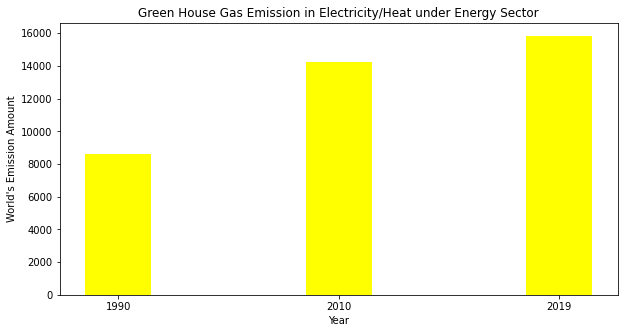

In [55]:
data = {'1990':8628, '2010':14211, '2019':15834}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='yellow',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Electricity/Heat under Energy Sector")
plt.show()

**Transportation**

Filtering by Transportation

In [56]:
transportation_data = df.loc[df['Sector'] == 'Transportation']
display(transportation_data)

,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
3,World,Transportation,All GHG,8434.96,8417.75,8278.48,8073.90,7923.23,7685.67,7558.39,...,5731.34,5566.9,5440.03,5360.38,5148.97,5012.39,4913.8,4871.85,4764.85,4725.54
10,United States,Transportation,All GHG,1815.66,1820.88,1781.51,1768.76,1756.63,1694.60,1701.51,...,1735.15,1688.19,1648.88,1623.42,1583.18,1551.22,1497.05,1472.87,1440.67,1468.6
14,China,Transportation,All GHG,926.36,926.84,901.30,868.04,850.57,790.70,760.69,...,161.34,144.05,149.92,173.91,130.65,119.37,128.96,113.87,103.06,96.28
16,European Union (27),Transportation,All GHG,835.06,827.98,827.88,812.81,793.45,778.58,771.03,...,788.18,770.04,740.19,728.42,705.6,696.82,692.22,687.02,668.8,660.09
32,India,Transportation,All GHG,315.88,313.25,298.71,276.27,264.40,241.81,232.00,...,95.64,91.02,87.97,85.95,80.3,72.65,70.33,70.26,68.61,66.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Kiribati,Transportation,All GHG,0.04,0.04,0.04,0.03,0.03,0.03,0.03,...,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01
557,Sao Tome and Principe,Transportation,All GHG,0.04,0.03,0.03,0.03,0.03,0.03,0.03,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
561,Nauru,Transportation,All GHG,0.02,0.02,0.02,0.02,0.01,0.01,0.01,...,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
573,Niue,Transportation,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Top 5 Country and their GHG emission by Transportation under Energy Sector as year passed by

In [57]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 Emission")
display(transportation_data.loc[0:41,["Country","1990"]], )
print("2010 Emission")
display(transportation_data.loc[0:41,["Country","2010"]], )
print("2019 Emission")
display(transportation_data.loc[0:41,["Country","2019"]], )

1990 Emission


,Country,1990
3,World,4725.54
10,United States,1468.6
14,China,96.28
16,European Union (27),660.09
32,India,66.02
41,Russia,305.91


2010 Emission


,Country,2010
3,World,7188.99
10,United States,1733.13
14,China,584.09
16,European Union (27),814.44
32,India,197.84
41,Russia,249.18


2019 Emission


,Country,2019
3,World,8434.96
10,United States,1815.66
14,China,926.36
16,European Union (27),835.06
32,India,315.88
41,Russia,262.39


Bar plot of emission

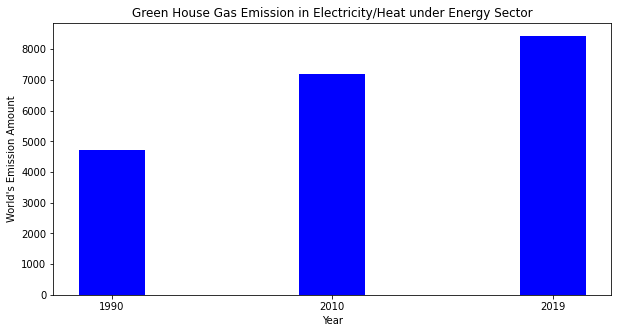

In [58]:
data = {'1990':4726, '2010':7189, '2019':8435}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='blue',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Electricity/Heat under Energy Sector")
plt.show()

Combined chart of Electricity and Transportation Emission. It shows the diffence in amount of emission.



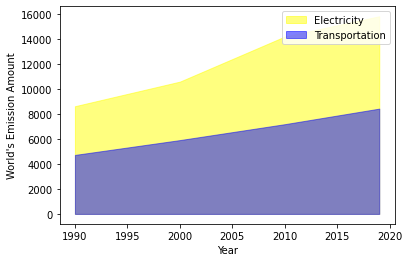

In [59]:
year = [1990, 2000,2010, 2019]

electricity =[8628, 10597, 14211,15834]

transpo =[4726, 5914, 7189,8435]


plt.fill_between(year, electricity, color="yellow",
                 alpha=0.5, label='Electricity')
plt.fill_between(year, transpo, color="blue",
                 alpha=0.5, label='Transportation')


plt.xlabel("Year")
plt.ylabel("World's Emission Amount")

plt.legend()
plt.show()



Under Energy sector are electricity/heat and transportation emission. This plot show the differences of emission between the three.

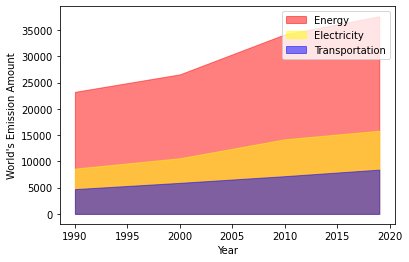

In [60]:
year = [1990, 2000,2010, 2019]

electricity =[8628, 10597, 14211,15834]

transpo =[4726, 5914, 7189,8435]


energy =[23244, 26576, 34194,37636]

plt.fill_between(year, energy, color="red",
                 alpha=0.5, label='Energy')

plt.fill_between(year, electricity, color="yellow",
                 alpha=0.5, label='Electricity')
plt.fill_between(year, transpo, color="blue",
                 alpha=0.5, label='Transportation')


plt.xlabel("Year")
plt.ylabel("World's Emission Amount")

plt.legend()
plt.show()

Analysis shows the increase of greenhouse gas emission from 1990 to 2019. It also shows which countries has the most emission.